# Flight Price:

### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd
df = pd.read_excel('flight_price.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

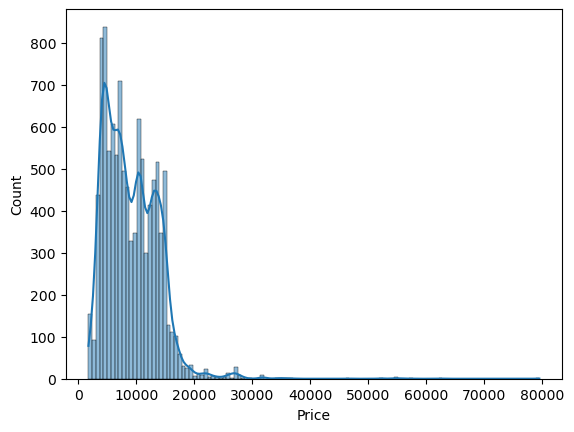

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.histplot(df['Price'], kde= True)
fig = plt.figure()

In [3]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
min_price = df['Price'].min()
max_price = df['Price'].max()
range_ = max_price - min_price
print('Max price :', max_price, 'Min Price :', min_price, 'Range is :', range_)

Max price : 79512 Min Price : 1759 Range is : 77753


<Axes: xlabel='Price', ylabel='Airline'>

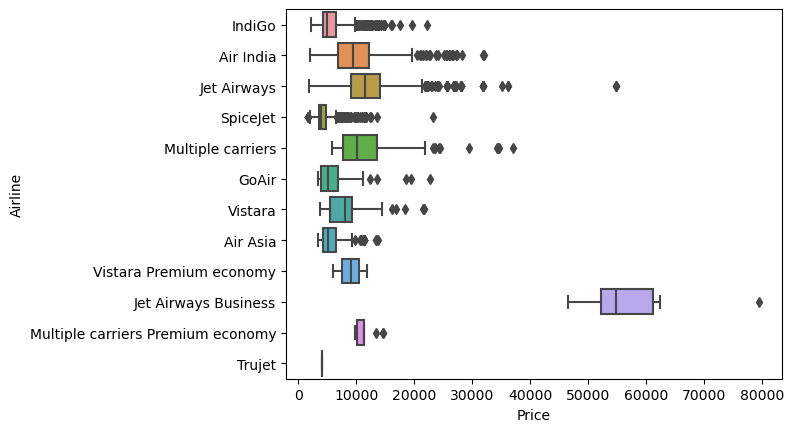

In [4]:
### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.
sns.boxplot(x=df['Price'], y = df['Airline'])

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

   In above boxplot diagram show that the many outliers in the dataset.
   
   **in jet airways there is a price 80000 is a potential outlier.**

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df['m_o_j'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True).dt.month
df_group = df.groupby(df.m_o_j)['Price'].count()
df_group

m_o_j
3    2724
4    1079
5    3466
6    3414
Name: Price, dtype: int64

- It shows that march is a super month for highers time to travel

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [7]:
groupded_data = df.groupby(['Source', 'Destination'])
total_sales = groupded_data['Price'].sum()
total_sales

Source    Destination
Banglore  Delhi           6507057
          New Delhi      11107312
Chennai   Kolkata         1824949
Delhi     Cochin         47817435
Kolkata   Banglore       26293736
Mumbai    Hyderabad       3526617
Name: Price, dtype: int64

**Here We can predict which route is more revenue generate from this dataset**

### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [8]:
# We previously see the route is most effects the revenue
## Month also a crutial point for revenue
### Now we analyze the time factor below
df['dep'] = pd.to_datetime(df.Dep_Time).dt.time
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,m_o_j,dep
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,22:20:00
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,05:50:00


In [9]:
groupded_dep = df.groupby(['dep'])['Price'].sum()
groupded_dep.sort_values(ascending = False)

dep
17:00:00    2256621
10:00:00    2229973
18:55:00    2226608
14:05:00    2119797
07:05:00    2041706
             ...   
03:05:00       8437
01:40:00       8262
12:05:00       4588
04:50:00       4176
04:15:00       4150
Name: Price, Length: 222, dtype: int64

### Above data shows which time generate most revenue

In [10]:
del df, groupded_data, groupded_dep

_____________________

# Google Playstore:

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [59]:
data=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
data.shape

(10841, 13)

In [60]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [61]:
df_copy = data.copy()
df_copy['Rating'].astype('float')

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

________________

In [62]:
### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.
df_copy = df_copy.drop(df_copy[df_copy['Category']=='1.9'].index)


<Axes: xlabel='Rating', ylabel='Category'>

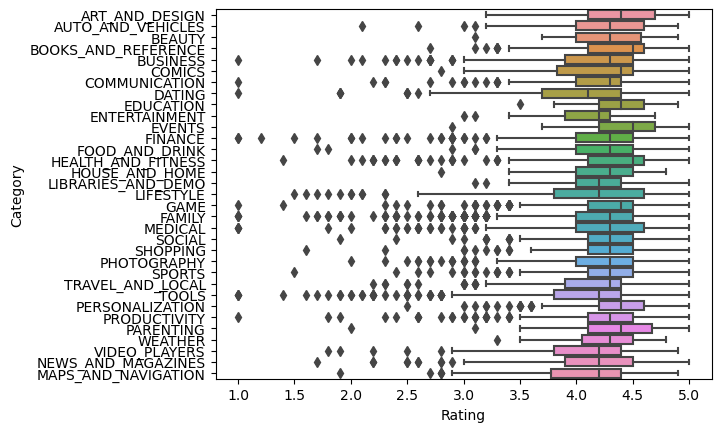

In [63]:
sns.boxplot(data = df_copy, x =df_copy['Rating'], y =df_copy['Category'] )

In [64]:
### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.
df_copy.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

<h3> There is a some impact of ratings, because Ratings are missing in 10%, Other Two Category are not effected  this</h3>
<hr size=3>

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [65]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

<Axes: xlabel='Size', ylabel='Rating'>

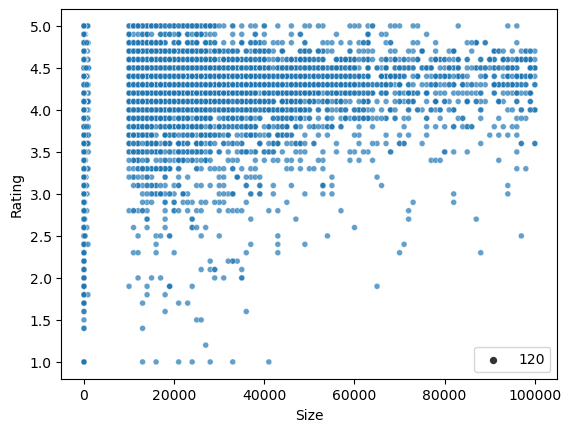

In [66]:
sns.scatterplot(data=df_copy, x = df_copy['Size'], y= df_copy['Rating'], marker="o", size=120, alpha=0.7)

In [67]:
### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
df_copy["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

<Axes: ylabel='Type'>

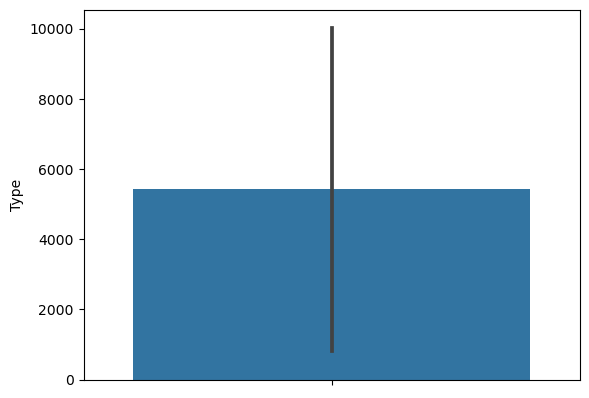

In [68]:
sns.barplot(data=df_copy, y = df_copy['Type'].value_counts() )

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.


In [69]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [70]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')
df_copy['Installs'] = df_copy['Installs'].astype('int')
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [71]:
installed = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
installed.iloc[:10, :]

,Category,Installs
0,GAME,35086024415
1,COMMUNICATION,32647276251
2,PRODUCTIVITY,14176091369
3,SOCIAL,14069867902
4,TOOLS,11452771915
5,FAMILY,10258263505
6,PHOTOGRAPHY,10088247655
7,NEWS_AND_MAGAZINES,7496317760
8,TRAVEL_AND_LOCAL,6868887146
9,VIDEO_PLAYERS,6222002720


In [72]:
## Lets go ahead and explore more data
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Rating', 'Size', 'Installs']

We have 10 categorical features : ['App', 'Category', 'Reviews', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

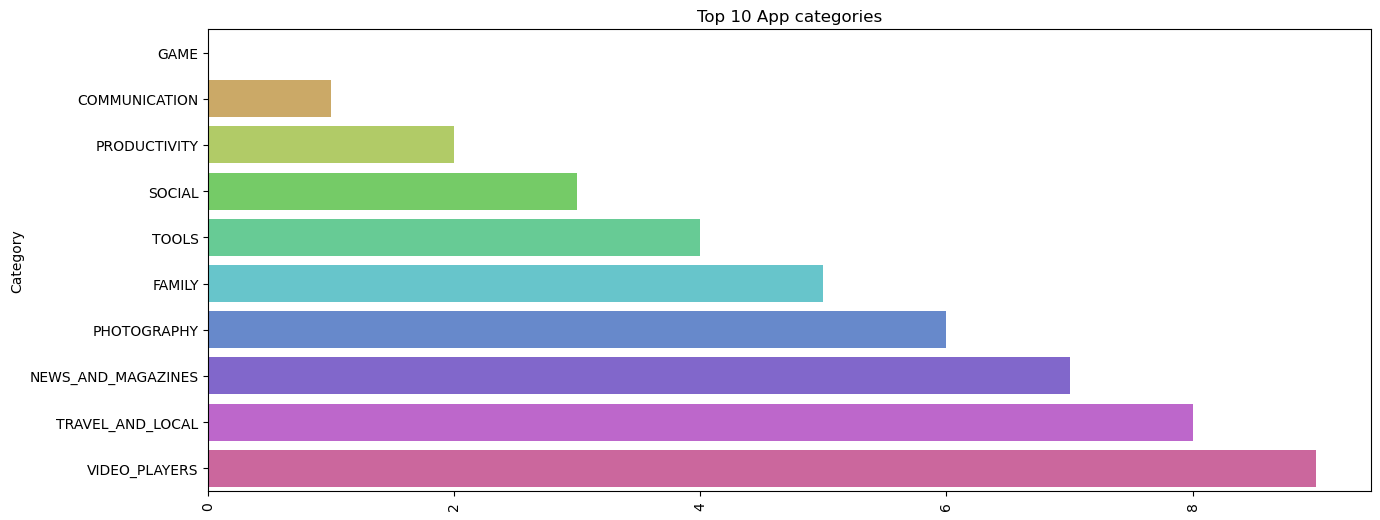

In [73]:
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=installed.index[:10], y ='Category',data = installed[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [78]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,100.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5000.0


In [79]:
rating_data = df_copy.groupby(['Category'])['Rating'].sum()
rating_data

Category
ART_AND_DESIGN          270.2
AUTO_AND_VEHICLES       305.9
BEAUTY                  179.7
BOOKS_AND_REFERENCE     773.6
BUSINESS               1248.8
COMICS                  241.0
COMMUNICATION          1364.0
DATING                  774.3
EDUCATION               680.3
ENTERTAINMENT           614.8
EVENTS                  199.6
FAMILY                 7323.9
FINANCE                1334.6
FOOD_AND_DRINK          454.2
GAME                   4702.1
HEALTH_AND_FITNESS     1270.3
HOUSE_AND_HOME          319.0
LIBRARIES_AND_DEMO      271.6
LIFESTYLE              1285.8
MAPS_AND_NAVIGATION     502.4
MEDICAL                1466.2
NEWS_AND_MAGAZINES      962.8
PARENTING               215.0
PERSONALIZATION        1361.5
PHOTOGRAPHY            1328.9
PRODUCTIVITY           1478.2
SHOPPING               1013.8
SOCIAL                 1102.2
SPORTS                 1347.3
TOOLS                  2970.8
TRAVEL_AND_LOCAL        928.7
VIDEO_PLAYERS           650.2
WEATHER                 318.3
N

In [84]:
df_copy['installs'] = df_copy["Installs"]/1000000
installed = df_copy.groupby(['Category'])['installs'].sum()
installed

Category
ART_AND_DESIGN           124.338100
AUTO_AND_VEHICLES         53.130211
BEAUTY                    27.197050
BOOKS_AND_REFERENCE     1921.469576
BUSINESS                1001.914865
COMICS                    56.086150
COMMUNICATION          32647.276251
DATING                   264.310807
EDUCATION                871.452000
ENTERTAINMENT           2869.160000
EVENTS                    15.973161
FAMILY                 10258.263505
FINANCE                  876.648734
FOOD_AND_DRINK           273.898751
GAME                   35086.024415
HEALTH_AND_FITNESS      1583.072512
HOUSE_AND_HOME           168.712461
LIBRARIES_AND_DEMO        62.995910
LIFESTYLE                537.643539
MAPS_AND_NAVIGATION      724.281890
MEDICAL                   53.257437
NEWS_AND_MAGAZINES      7496.317760
PARENTING                 31.521110
PERSONALIZATION         2325.494782
PHOTOGRAPHY            10088.247655
PRODUCTIVITY           14176.091369
SHOPPING                3247.848785
SOCIAL             

In [90]:
con = pd.concat([installed, rating_data], axis=1)
con.shape

(33, 2)

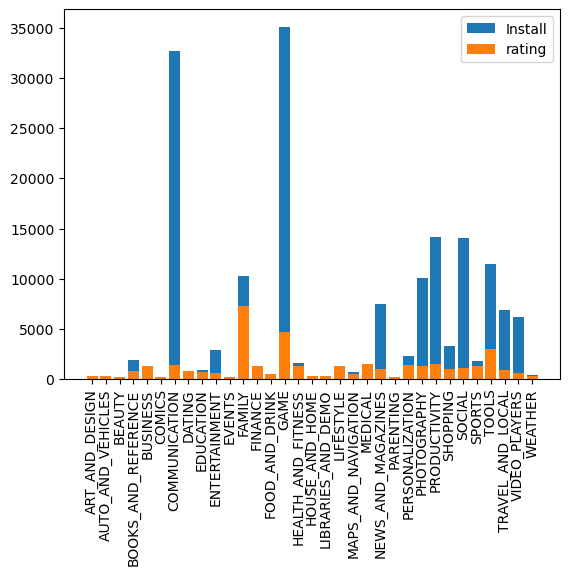

In [103]:
plt.bar(con.index, con.installs, label = 'Install')
plt.bar(con.index, con.Rating, label = 'rating')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

___________






Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

In [104]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.01
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.50


##### According to data set no launch date is avialiable here we could not predict the data,
    - if we assume **last Updated** as launch date then here is the data

In [105]:
df_copy['launch_date'] = pd.to_datetime(df_copy['Last Updated']).dt.date
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installs,launch_date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.01,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.50,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5.00,2018-08-01


In [113]:
df_copy['l_date'] = pd.to_datetime(df_copy['launch_date']).dt.day
df_copy['l_month'] = pd.to_datetime(df_copy['launch_date']).dt.month
df_copy['l_year'] = pd.to_datetime(df_copy['launch_date']).dt.year
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installs,launch_date,l_d,l_date,l_month,l_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.01,2018-01-07,7,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.50,2018-01-15,15,15,1,2018


In [120]:
# Finding Best month to launch the app
best_date = df_copy.groupby(['Installs', 'l_month', 'Category',])['Installs'].sum().sort_values(ascending = False)
best_date[:21]

Installs    l_month  Category          
1000000000  8        COMMUNICATION         15000000000
500000000   7        GAME                   7000000000
100000000   7        GAME                   6900000000
1000000000  7        GAME                   6000000000
                     SOCIAL                 6000000000
500000000   7        COMMUNICATION          5000000000
1000000000  8        NEWS_AND_MAGAZINES     4000000000
            7        COMMUNICATION          4000000000
            8        PHOTOGRAPHY            4000000000
500000000   8        PRODUCTIVITY           3000000000
1000000000  7        TRAVEL_AND_LOCAL       3000000000
            8        PRODUCTIVITY           3000000000
                     VIDEO_PLAYERS          3000000000
500000000   7        TOOLS                  2500000000
            8        NEWS_AND_MAGAZINES     2500000000
100000000   7        COMMUNICATION          2400000000
            8        PRODUCTIVITY           2200000000
50000000    7        GAME

### Most Favorable time is July and August month